<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/CRP_CREDIT_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
import collections as coll

In [ ]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d prasy46/credit-score-prediction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 92% 12.0M/13.1M [00:00<00:00, 21.2MB/s]
100% 13.1M/13.1M [00:00<00:00, 14.8MB/s]


In [ ]:
! unzip credit-score-prediction.zip

Archive:  credit-score-prediction.zip
  inflating: CreditScore_test.csv    
  inflating: CreditScore_train.csv   


In [ ]:
df = pd.read_csv('/content/CreditScore_train.csv')

In [ ]:
cols_to_drop = []
for col in list(df):
  if df[col].isnull().sum()>4000:
    cols_to_drop.append(col)

print(cols_to_drop)

df = df.drop(cols_to_drop,axis = 1)

['x002', 'x003', 'x004', 'x005', 'x041', 'x044', 'x045', 'x057', 'x058', 'x098', 'x148', 'x155', 'x162', 'x222', 'x223', 'x234', 'x235', 'x237', 'x238', 'x239', 'x242', 'x253', 'x255', 'x256', 'x257', 'x259', 'x265', 'x266', 'x267', 'x268', 'x272', 'x275', 'x287', 'x288', 'x289', 'x290', 'x293', 'x295', 'x297', 'x302', 'x304']


In [ ]:
df

x001  x006  x007  x008  x009  x010  x011  x012  x013  x014  ...  \
0      1084094     0     0     0     0     0     2     4     4     9  ...   
1      1287777     1     1     2     0     1     3     3     7     5  ...   
2      1483016     0     0     0     1     0     1     0     0     6  ...   
3       959054     0     0     0     0     0     0     2     2     0  ...   
4      1342113     0     2     2     0     0     1     2     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
79995  1482075     0     1     1     0     0     0     0     0     0  ...   
79996   994459     0     0     0     0     2     3     1     1     5  ...   
79997  1168324     0     1     1     0     1     1     0     0     1  ...   
79998  1307105     0     1     2     0     1     2     1     2     5  ...   
79999   405160     0     2     2     8    11    10     8     1     1  ...   

        x291    x292   x294   x296  x298  x299  x300  x301   x303    y  
0          0  346762      0      0     0     0     0     0      0  807  
1      17318  124634      0  17318     1     1     1     0      0  819  
2          0       0      0      0     0     0     0     0      0  803  
3          0       0      0      0     1     1     1     0      0  530  
4      17413   17413      0  17413     1     1     1     0      0  485  
...      ...     ...    ...    ...   ...   ...   ...   ...    ...  ...  
79995  12855   12855      0  12855     1     1     1     0      0  514  
79996      0  119334      0      0     0     0     0     0      0  810  
79997  20977  142572      0  20977     1     1     1     0      0  711  
79998  35621   48177      0  35621     1     1     1     0      0  684  
79999  75545  356213  31094  44451     1     1     1     0  44451  465  

[80000 rows x 264 columns]

In [ ]:
non_int  = []

for col in list(df):
  if df[col].dtypes!='int64':
    non_int.append(col)

print(non_int)

#all integer variables

[]


<AxesSubplot:>

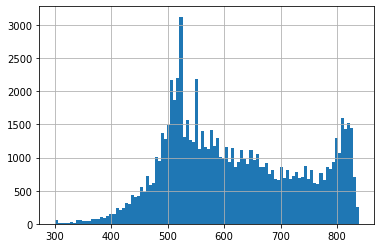

In [ ]:
df['y'].hist(bins = 100)

## SMOGN 

In [ ]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import smogn

df_smogn = smogn.smoter(data = df, y = 'y',rel_coef = 0.50)


## GAN generated

Note: This phenomenon shows that, for continuous labels, the empirical label density does not accurately reflect the imbalance as seen by the model, or the neural network.

LABEL DISTRIBUTION SMOOTHING



In [ ]:
n_unique=df['y'].nunique()
n_rows = len(list(df.index))
thresh = round(n_rows/n_unique)

In [ ]:
c = dict(coll.Counter(df['y']))


In [ ]:
minority = []
for k,v in c.items():
  if v < thresh*0.25:
    minority.append(k)
print(minority)

[390, 393, 414, 385, 371, 397, 337, 394, 403, 363, 388, 322, 344, 373, 372, 404, 357, 348, 345, 401, 376, 402, 400, 379, 370, 392, 346, 340, 311, 417, 398, 399, 342, 837, 358, 368, 313, 839, 410, 405, 381, 355, 365, 364, 361, 366, 389, 343, 838, 386, 349, 327, 375, 367, 351, 391, 324, 332, 350, 369, 319, 330, 320, 347, 378, 334, 360, 353, 408, 383, 406, 359, 396, 302, 384, 331, 382, 387, 339, 407, 352, 318, 338, 356, 377, 309, 301, 323, 333, 308, 395, 303, 310, 306, 380, 374, 362, 328, 314, 325, 329, 321, 335, 341, 336, 326, 316, 315, 304, 354, 312, 307, 317]


In [ ]:
minority = sorted(minority)
print(minority)

[301, 302, 303, 304, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 410, 414, 417, 837, 838, 839]


In [ ]:
minority_df = df[df['y']==minority[0]]

for i in range(1,len(minority)):
  temp_df = df[df['y']==minority[i]]
  minority_df = pd.concat([minority_df,temp_df],)


minority_df = minority_df.sample(frac=1).reset_index(drop=True) 

In [ ]:
minority_df

x001  x006  x007  x008  x009  x010  x011  x012  x013  x014  ...  \
0      788392     0     0     1     0     0     0     0     0     0  ...   
1      877220     0     1     1     0     0     0     0     0     0  ...   
2      906744     0     1     6     2     0     0     0     0     2  ...   
3      905686     0     0     1     0     0     0     0     0     0  ...   
4     1201218     0     0     1     0     0     0     0     0     0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1389  1330630     1     1     3     0     1     3     5     0     0  ...   
1390   994970     1     0     1     2     0     0     0     0     0  ...   
1391   922635     0     3     3     2     0     1     1     0     0  ...   
1392   953263     1     0     1     0     0     0     1     0     0  ...   
1393  1216585     1     7     7     0     0     0     3     4     3  ...   

       x291   x292   x294   x296  x298  x299  x300  x301   x303    y  
0         0      0      0      0     0     0     0     0      0  349  
1         0      0      0      0     0     0     0     0      0  414  
2     84098  84098  64407  19691     1     1     1     1  83934  350  
3       228    228    228      0     1     1     1     0      0  373  
4       441    441    441      0     0     1     1     0      0  349  
...     ...    ...    ...    ...   ...   ...   ...   ...    ...  ...  
1389   4359   4359    171   4188     1     1     1     0   4188  391  
1390    829    829    829      0     1     1     1     1    829  375  
1391   9968   9968   9968      0     1     1     1     1   9674  386  
1392      0      0      0      0     0     0     0     0      0  388  
1393      0      0      0      0     0     0     0     1      0  404  

[1394 rows x 264 columns]

<AxesSubplot:>

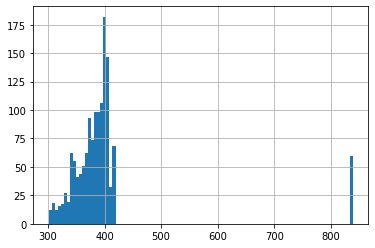

In [ ]:
minority_df['y'].hist(bins=100)

In [ ]:
minority_df['y'].nunique()

145

In [ ]:
!pip install ctgan
!pip install table_evaluator

In [ ]:
minority_df.shape

(3121, 264)

In [ ]:
from ctgan import CTGAN
#from table_evaluator import TableEvaluator

ctgan = CTGAN(verbose=True)

ctgan.fit(minority_df, epochs=200)

Epoch 1, Loss G:  0.5073,Loss D: -0.5758
Epoch 2, Loss G:  1.5903,Loss D: -2.3801
Epoch 3, Loss G:  2.4934,Loss D: -4.5239
Epoch 4, Loss G:  3.4016,Loss D: -7.2799
Epoch 5, Loss G:  4.6161,Loss D: -9.0473
Epoch 6, Loss G:  5.1285,Loss D: -11.3423
Epoch 7, Loss G:  5.3105,Loss D: -12.4414
Epoch 8, Loss G:  4.2358,Loss D: -13.5915
Epoch 9, Loss G:  2.5821,Loss D: -11.5228
Epoch 10, Loss G: -0.2709,Loss D: -9.8141
Epoch 11, Loss G: -2.3350,Loss D: -8.3587
Epoch 12, Loss G: -4.0440,Loss D: -5.9112
Epoch 13, Loss G: -6.2433,Loss D: -3.4132
Epoch 14, Loss G: -7.0901,Loss D: -2.1767
Epoch 15, Loss G: -7.7055,Loss D: -0.7555
Epoch 16, Loss G: -7.4585,Loss D: -0.9785
Epoch 17, Loss G: -7.5090,Loss D: -2.3337
Epoch 18, Loss G: -8.1633,Loss D: -1.0961
Epoch 19, Loss G: -7.7523,Loss D: -1.0706
Epoch 20, Loss G: -8.6407,Loss D: -0.8036
Epoch 21, Loss G: -8.7710,Loss D:  0.4521
Epoch 22, Loss G: -8.8006,Loss D: -0.5264
Epoch 23, Loss G: -7.8569,Loss D: -0.2677
Epoch 24, Loss G: -6.8087,Loss D:  0.20

In [ ]:
samples = ctgan.sample(10000)


In [ ]:
samples2 = ctgan.sample(4000)

<AxesSubplot:>

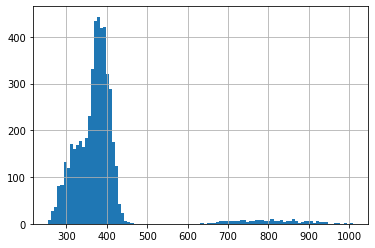

In [ ]:
samples['y'].hist(bins = 100)

In [ ]:
samples

x001  x006  x007  x008  x009  x010  x011  x012  x013  x014  ...  \
0     1138554     0     5     0     1     0     1     0     0     0  ...   
1     1185591     1     2     2     3     3     3     5     0     1  ...   
2     1477983     0     0     3     0     1     0     0     2     0  ...   
3     1658747     1     4     1     0     0     1     0     1     0  ...   
4     1630661     0     0     6     2     0     1     0     0     0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2995  1251154     0     9     3    11     0     0     0     1     0  ...   
2996   866479     0     0     1     1     0    10     0     0    16  ...   
2997   991762     0     0     3     1     0     1     5     5     0  ...   
2998  1134504     1     0     0     1     1     0     0     3     6  ...   
2999  1034031     1     1     0    12     2     0     0     0     0  ...   

       x291    x292   x294  x296  x298  x299  x300  x301   x303    y  
0     -2039    2748  14426  -635     1     1     1     0    -45  453  
1     -2311    5986    674  1150     1     1     0     0  31210  439  
2     -1406   24388  86483   470     1     1     0     0    154  442  
3     -1683   25628  23938   492     1     1     0     1     87  441  
4       450   15630   8288  -107     1     1     0     0    525  367  
...     ...     ...    ...   ...   ...   ...   ...   ...    ...  ...  
2995  -1869   35961  28874  -272     1     1     1     1    676  407  
2996   2362    1515  25709   413     1     0     0     0   1515  407  
2997  28774   33044  21035  4157     1     1     0     1   -428  399  
2998    820   18127  19718   -55     1     1     1     0    117  414  
2999  35483  136361    504   360     1     1     0     0   -142  398  

[3000 rows x 264 columns]

In [ ]:
print(minority_df.shape,samples.shape)

(3121, 264) (3000, 264)


In [ ]:
augmented_df = pd.concat([samples,df],ignore_index=True)
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)


In [ ]:
import random

copy = augmented_df

c1 = dict(coll.Counter(copy['y']))

majority = []
for k,v in c.items():
  if v > thresh*1.5:
    majority.append(k)

majority = sorted(majority)

majority_df = copy[copy['y']==majority[0]]

for i in range(1,len(majority)):
  temp_copy = copy[copy['y']==majority[i]]
  majority_df = pd.concat([majority_df,temp_copy])

ind = majority_df.index.tolist()

sub_ind = random.sample(ind, int(len(ind) * 0.6))

copy.drop(sub_ind, inplace=True)







<AxesSubplot:>

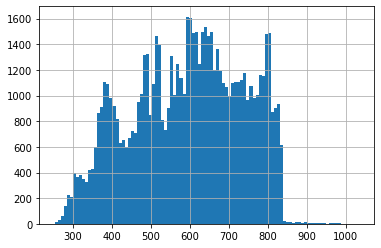

In [ ]:
copy['y'].hist(bins=100)

<AxesSubplot:>

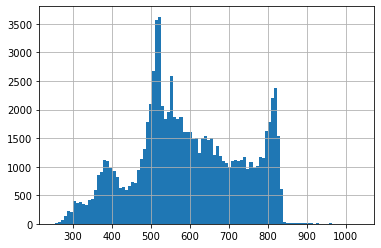

In [ ]:
augmented_df['y'].hist(bins = 100)

<AxesSubplot:>

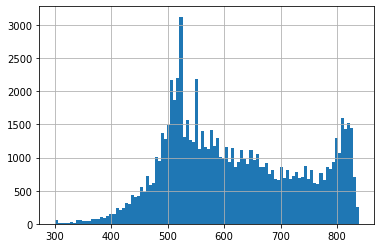

In [ ]:
df['y'].hist(bins = 100)

In [ ]:
X_df = df.drop(columns = ['y'])
y_df = df['y']

X_augmented = copy.drop(columns = ['y'])
y_augmented = copy['y']

In [ ]:
X_smogn = df_smogn.drop(columns = ['y'])
y_smogn = df_smogn['y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=100)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_augmented, y_augmented, test_size=0.20, random_state=100)




In [ ]:
X_train_smogn, X_test_smogn, y_train_smogn, y_test_smogn = train_test_split(X_smogn, y_smogn, test_size=0.20, random_state=100)

### Random forest

In [ ]:
rf = RandomForestRegressor()

In [ ]:
#ORIGINAL
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 SCORE:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2 SCORE: 0.9343270050214358
MSE: 908.137775025


In [ ]:
#GAN AUGMENTED 
rf.fit(X_train_a, y_train_a)
y_pred_a = rf.predict(X_test_a)
print('R2 SCORE:', r2_score(y_test_a, y_pred_a))
print('MSE:', mean_squared_error(y_test_a, y_pred_a))

R2 SCORE: 0.8912856594515748
MSE: 2207.2304564200144


In [ ]:
#SMOGN
rf.fit(X_train_smogn, y_train_smogn)
y_pred_smogn = rf.predict(X_test_smogn)
print('R2 SCORE:', r2_score(y_test_smogn, y_pred_smogn))
print('MSE:', mean_squared_error(y_test_smogn, y_pred_smogn))


### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [ ]:
#ORIGINAL
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('R2 SCORE:', r2_score(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))

R2 SCORE: 0.7857642736662728
MSE: 2962.489466287921


In [ ]:
#GAN AUGMENTED 
lr.fit(X_train_a, y_train_a)
y_pred_a_lr = lr.predict(X_test_a)
print('R2 SCORE:', r2_score(y_test_a, y_pred_a_lr))
print('MSE:', mean_squared_error(y_test_a, y_pred_a_lr))

R2 SCORE: 0.7639701244886599
MSE: 4792.12151060784


### Ridge

In [ ]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=1.0)

In [ ]:
#ORIGINAL
rid.fit(X_train, y_train)
y_pred_rid = rid.predict(X_test)
print('R2 SCORE:', r2_score(y_test, y_pred_rid))
print('MSE:', mean_squared_error(y_test, y_pred_rid))

R2 SCORE: 0.7857646708249254
MSE: 2962.483974307918


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.57087e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
#GAN AUGMENTED 
rid.fit(X_train_a, y_train_a)
y_pred_a_rid = rid.predict(X_test_a)
print('R2 SCORE:', r2_score(y_test_a, y_pred_a_rid))
print('MSE:', mean_squared_error(y_test_a, y_pred_a_rid))

R2 SCORE: 0.7837254593218005
MSE: 3276.303411735945


## Table evaluator

In [ ]:
!pip install table_evaluator

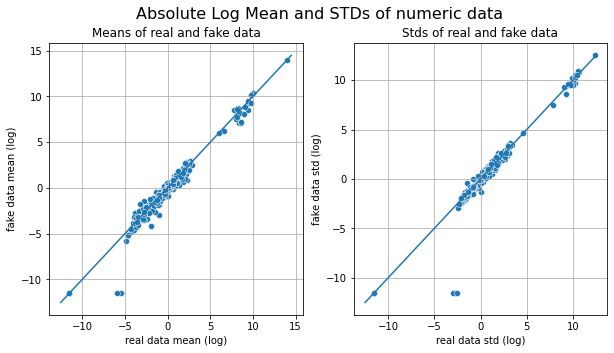

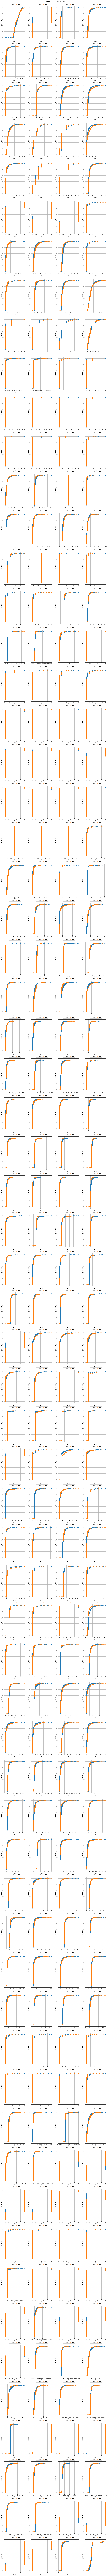

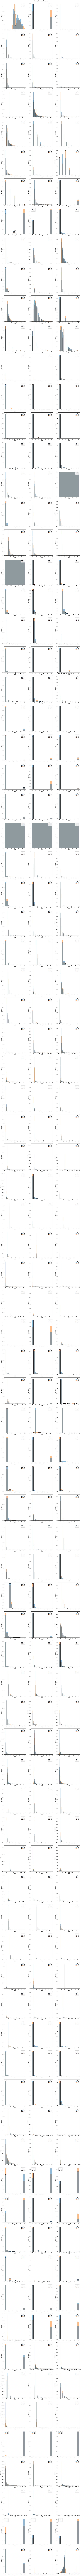

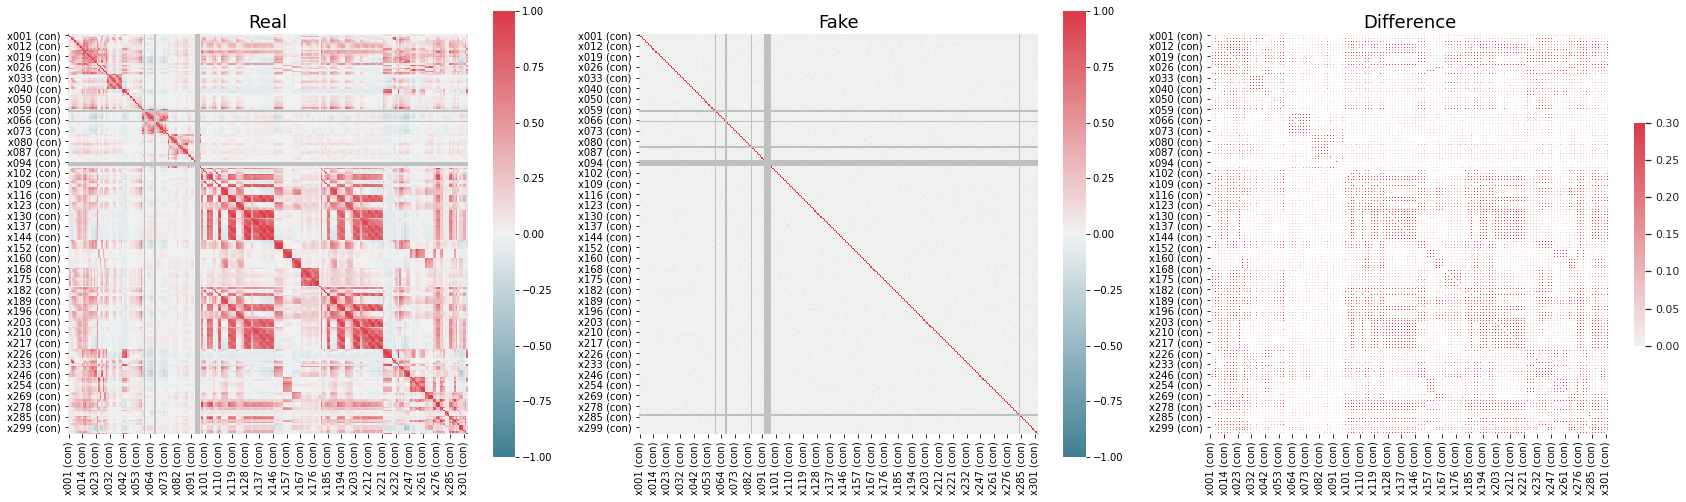

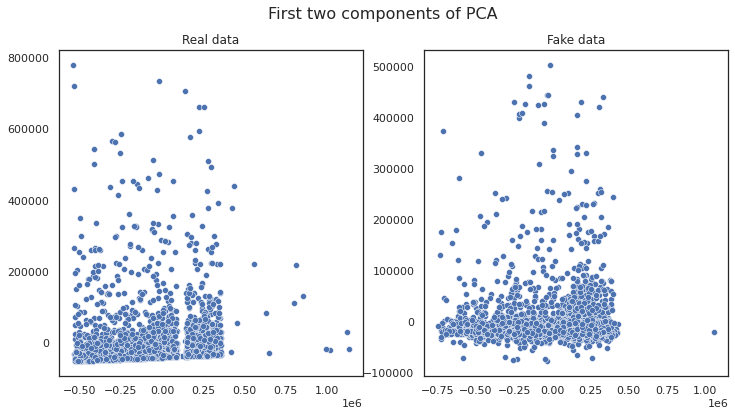

In [ ]:
from table_evaluator import TableEvaluator 

table_evaluator=TableEvaluator(minority_df, samples)

table_evaluator.visual_evaluation()

useful sites: 

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://towardsdatascience.com/strategies-and-tactics-for-regression-on-imbalanced-data-61eeb0921fca

https://pypi.org/project/smogn/

https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data

https://pypi.org/project/ctgan/
